<a href="https://colab.research.google.com/github/Rpmalukani22/Deep-learning-coursera/blob/master/Learn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='svg'

In [0]:
learning_rate=0.001
epoches=300

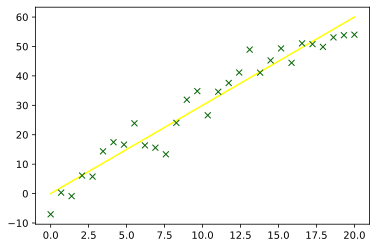

In [4]:
#creating a toy dataset
n_samples=30
x_train=np.linspace(0,20,n_samples)
y_train=3*x_train+5*np.random.randn(n_samples)
plt.plot(x_train,3*x_train,color='yellow')
plt.plot(x_train,y_train,'x',color='darkgreen')

In [0]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
W=tf.Variable(np.random.randn(),name='weights')
B=tf.Variable(np.random.randn(),name='bias')
Pred=X*W+B

In [6]:
loss=tf.reduce_mean(((Y-Pred)**2))
opt=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
with tf.Session() as ses:
  ses.run(tf.global_variables_initializer())
  for epoch in range(epoches+1):
    for x,y in zip(x_train,y_train):
      #print(x,y)
      ses.run(opt,feed_dict={X:x,Y:y})
    if not epoch%20:
      l=ses.run(loss,feed_dict={X:x_train,Y:y_train})
      w=ses.run(W)
      b=ses.run(B)
      print('Epoch %s loss %s Weight %s Bias %s'%(epoch,l,w,b))
    w=ses.run(W)
    b=ses.run(B)


Epoch 0 loss 32.52946 Weight 2.7927046 Bias -1.4279484
Epoch 20 loss 31.339468 Weight 2.7677193 Bias -0.9328307
Epoch 40 loss 30.541296 Weight 2.7485836 Bias -0.5539415
Epoch 60 loss 29.995625 Weight 2.7339401 Bias -0.2639951
Epoch 80 loss 29.616186 Weight 2.722734 Bias -0.04211234
Epoch 100 loss 29.348177 Weight 2.7141583 Bias 0.12768467
Epoch 120 loss 29.156158 Weight 2.7075958 Bias 0.25762236
Epoch 140 loss 29.01685 Weight 2.702574 Bias 0.35705766
Epoch 160 loss 28.914755 Weight 2.698731 Bias 0.4331515
Epoch 180 loss 28.839233 Weight 2.69579 Bias 0.49138236
Epoch 200 loss 28.783003 Weight 2.6935394 Bias 0.53594345
Epoch 220 loss 28.740843 Weight 2.6918173 Bias 0.5700445
Epoch 240 loss 28.709124 Weight 2.6904993 Bias 0.5961408
Epoch 260 loss 28.685184 Weight 2.6894906 Bias 0.6161097
Epoch 280 loss 28.667025 Weight 2.6887188 Bias 0.6313914
Epoch 300 loss 28.653223 Weight 2.6881282 Bias 0.64308643


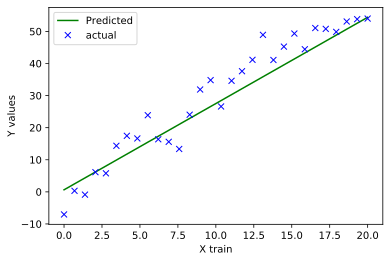

In [8]:
y_pred=w*x_train+b
plt.plot(x_train,y_pred,color='green',label='Predicted')
plt.plot(x_train,y_train,'x',color='blue',label='actual')
plt.xlabel('X train')
plt.ylabel('Y values')
plt.legend()
plt.show()